In [35]:
from data_loader import Data_Loader

import pm4py
 
num = 9
should_print = False

# path = f'/Users/philippeichhorn/Downloads/Compositional process discovery_experiment data/IP-{num}/IP-{num}_initial_log.xes'
# path = f'/Users/philippeichhorn/Downloads/Compositional process discovery_experiment data/IP-{num}/IP-{num}_init_log.xes'
path = f'/Users/philippeichhorn/IdeaProjects/Multi-Agent-Process-Discovery/backend/ip_logs/IP-{num}_init_log.xes'
list_of_nets = Data_Loader.create_petri_nets(path)

parsing log, completed traces :: 100%|██████████| 5000/5000 [00:04<00:00, 1170.12it/s]


In [36]:
from pm4py.objects.petri_net.utils import petri_utils
import pm4py.objects.petri_net.utils as pnutils
from pm4py.objects.petri_net.obj import PetriNet
from InteractionUtils import InteractionUtils
# class InteractionUtils:

    # @staticmethod
    # def connect_async_interactions(net: PetriNet):
    #     for trans in net.transitions:
    #         if trans.label and '!' in trans.label:
    #             trans.properties.update({"resource": '!'})
    #             for trans2 in net.transitions:
    #                 if trans2.label == trans.label.replace('!', '?'):
    #                     trans2.properties.update({"resource": '?'})
    #                     new_place = pnutils.petri_utils.add_place(net, "resource", )
    #                     new_place.properties.update({"resource":True})
    #                     pnutils.petri_utils.add_arc_from_to(trans, new_place,net)
    #                     pnutils.petri_utils.add_arc_from_to(new_place, trans2, net)

    # @staticmethod
    # def connect_sync_interactions(net:PetriNet):
    #     for trans in net.transitions.copy():
    #         for trans2 in net.transitions.copy():
    #             if net.transitions.__contains__(trans2):
    #                 if trans.name == trans2.name:
    #                     for arc in trans2.in_arcs.copy():
    #                         petri_utils.add_arc_from_to(arc.source, trans, net)
    #                     for arc in trans2.out_arcs.copy():
    #                         petri_utils.add_arc_from_to(trans, arc.target , net)
    #                     trans.properties.update({"resource":"s"})
    #                     petri_utils.remove_transition(net, trans2)


    # @staticmethod
    # def merge_two_nets(a, b):
    #     merged_net = pnutils.petri_utils.merge(nets=[a, b])
    #     InteractionUtils.connect_async_interactions(merged_net)
    #     InteractionUtils.connect_sync_interactions(merged_net)
    #     return merged_net

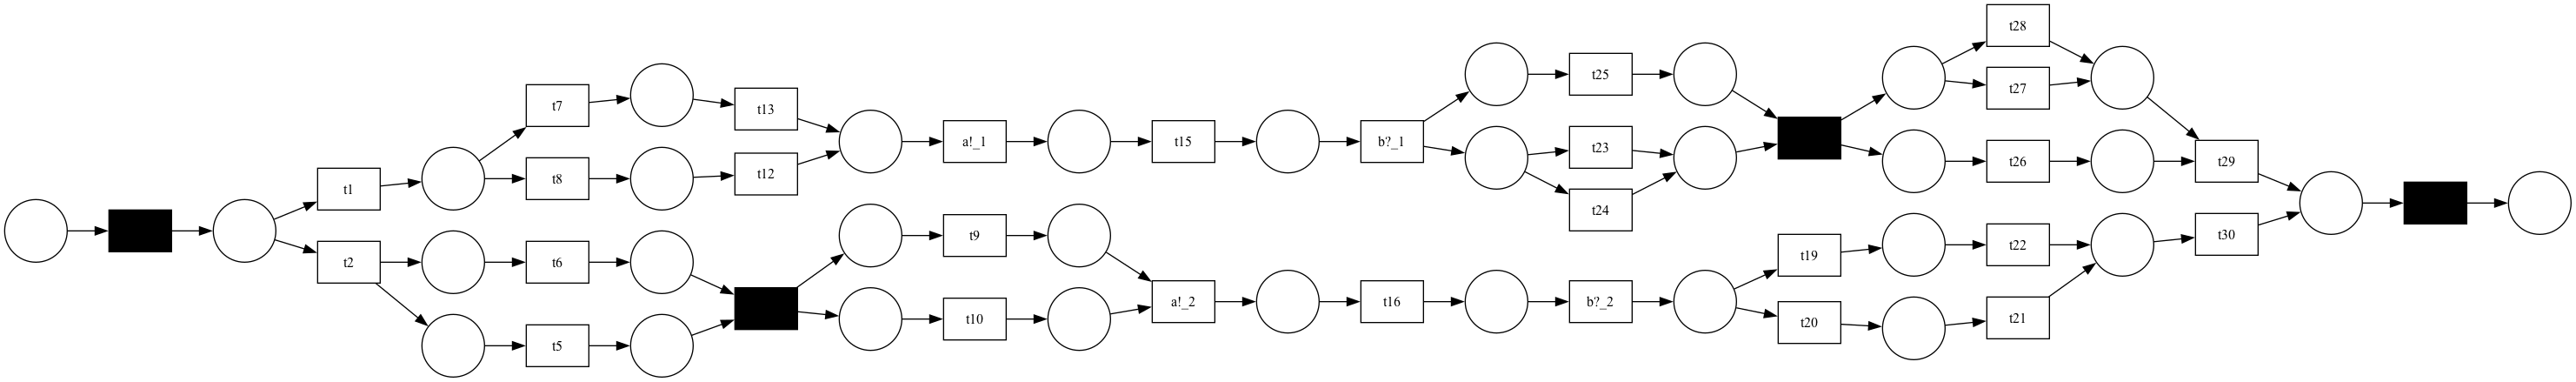

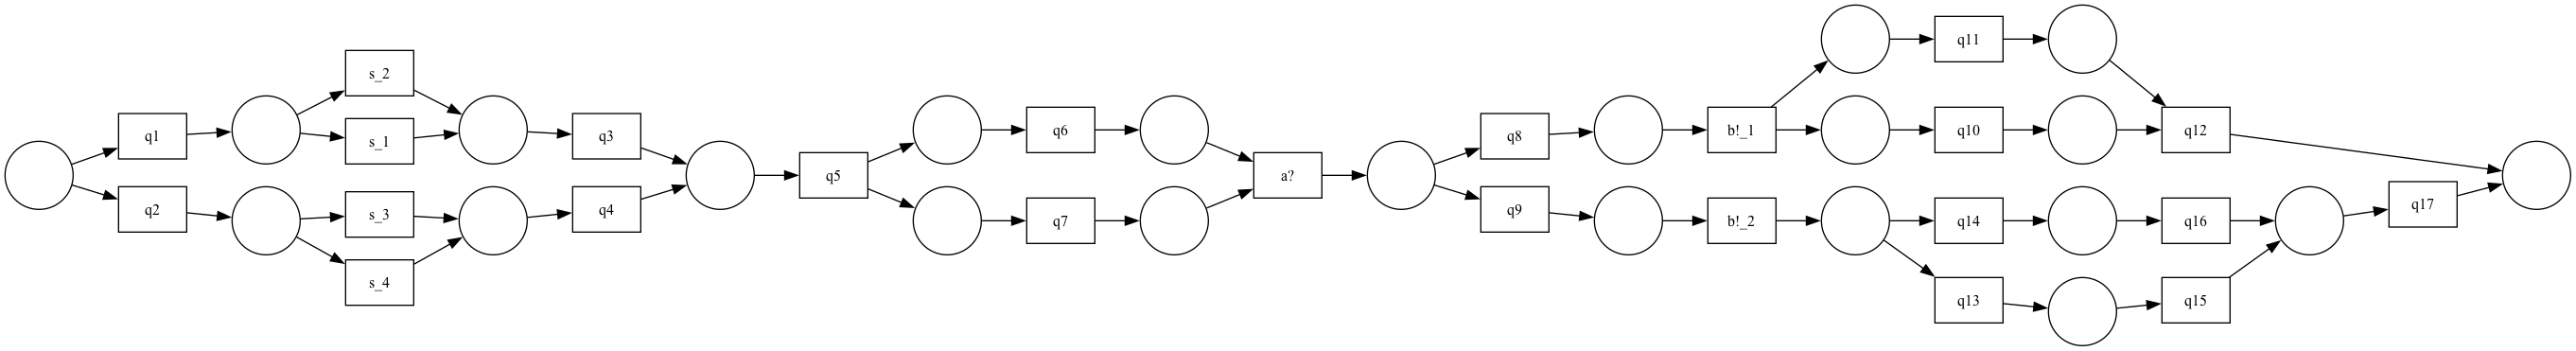

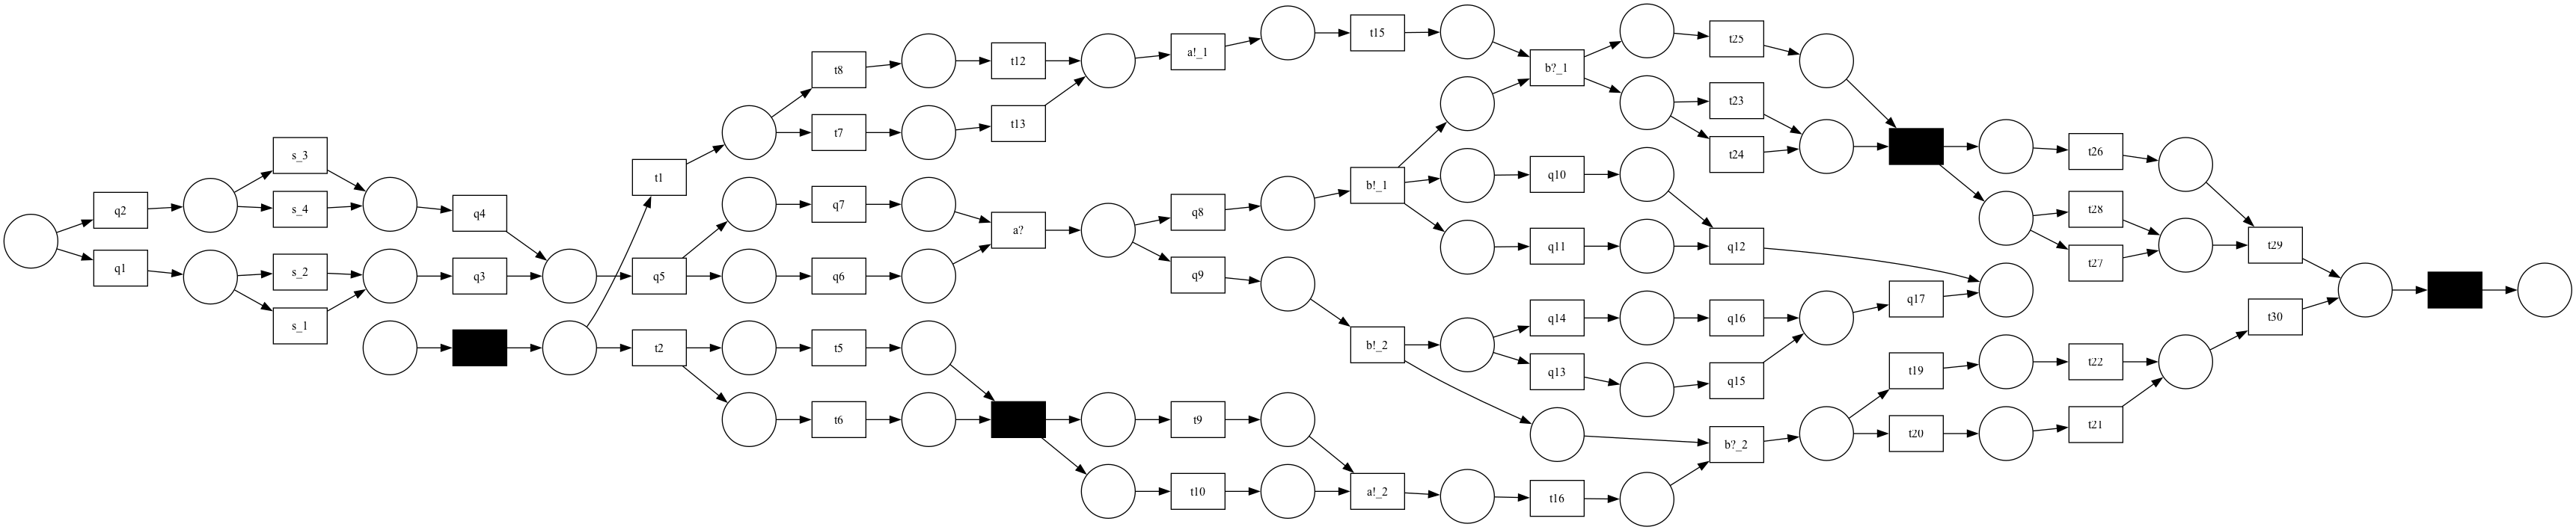

In [37]:

net1, b,b = list_of_nets[0]
net2, b,b = list_of_nets[1]
pm4py.view_petri_net(net1)
pm4py.view_petri_net(net2)



net = InteractionUtils.merge_two_nets(net1, net2)
pm4py.view_petri_net(net)



net before reduction:


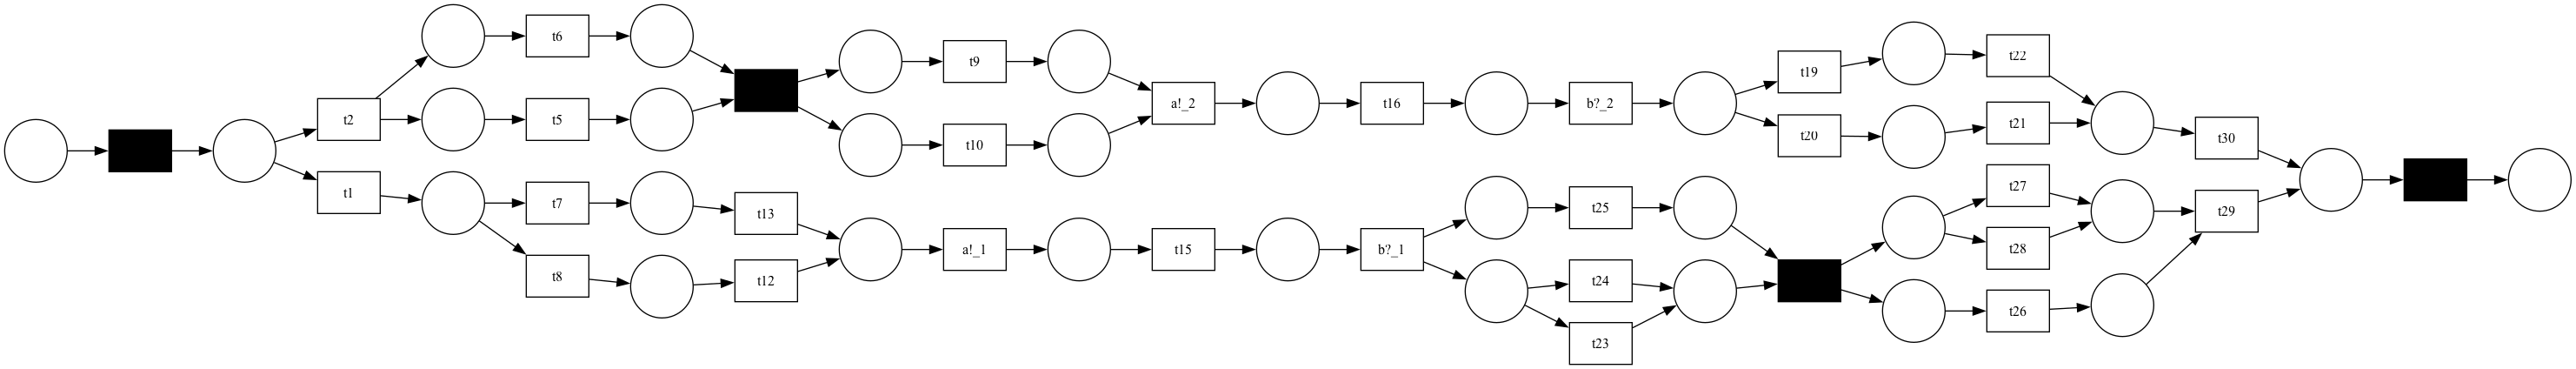

Checking conditions for transition: t21 and other_trans: t22
Checking conditions for transition: t13 and other_trans: t12
Checking conditions for transition: b?_2 and other_trans: b?_1
net after reduction:


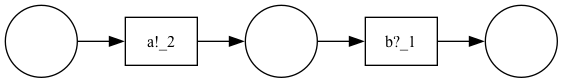

net before reduction:


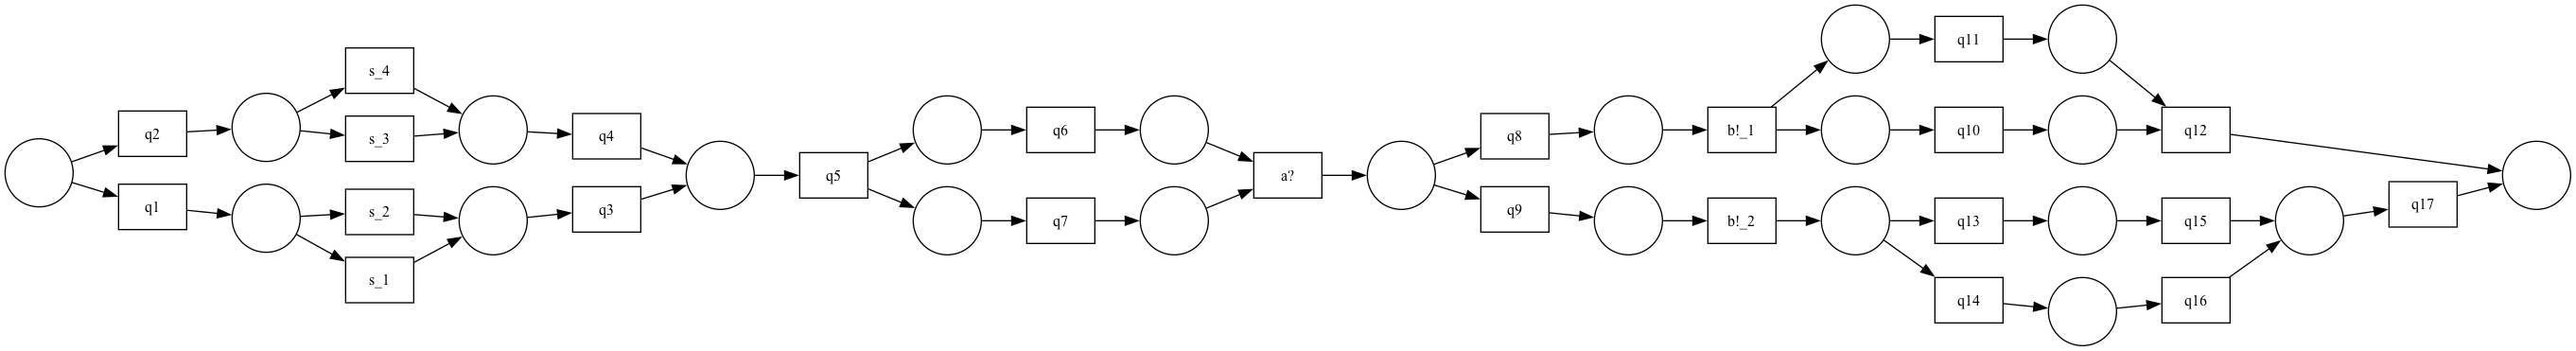

Checking conditions for transition: q4 and other_trans: q3
Checking conditions for transition: q16 and other_trans: q15
Checking conditions for transition: s_3 and other_trans: s_2
unfofficial rule in action
Checking conditions for transition: s_4 and other_trans: s_2
unfofficial rule in action
Checking conditions for transition: s_1 and other_trans: s_4
unfofficial rule in action
Checking conditions for transition: s_2 and other_trans: s_4
unfofficial rule in action
net after reduction:


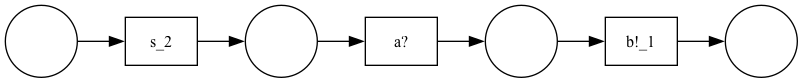

In [38]:

from pm4py import PetriNet
from Reducer import Reducer
from Refiner import Refiner
from interface_patterns import interface_patterns
from refinement_algorithm import are_petri_nets_isomorphic, is_refinement_via_astar

# pnet = net.__deepcopy__()
pnet1 = net1.__deepcopy__()
pnet2 = net2.__deepcopy__()



print("net before reduction:")
pm4py.view_petri_net(pnet1)
pnet = Reducer.apply(pnet1, should_print)
print("net after reduction:")
pm4py.view_petri_net(pnet1)
print("net before reduction:")
pm4py.view_petri_net(pnet2)
pnet = Reducer.apply(pnet2, should_print)
print("net after reduction:")
pm4py.view_petri_net(pnet2)
# Refiner.reverse_apply(pnet, changes)
# print("net after refinement:")
# pm4py.view_petri_net(pnet)

patterns = interface_patterns.get_patterns()

# # p4,_,_ = patterns[3]
# simplenet, _, _, _ = Refiner.create_simple_petri_net()
# # # lets do it simple:
# # pm4py.view_petri_net(net1)
# # pm4py.view_petri_net(simplenet)

# is_refinement_via_astar(net1, simplenet)


# count = 1
# for p in patterns:
#     count = count +1
#     p, _,_ = p
#     if are_petri_nets_isomorphic(pnet, p):
#         print('net is ip', count)
#         break
# pm4py.view_petri_net(pnet)




# def remove_transition(net, transition):
#     #check if current transition has one in on out arc (might not be sufficient todo check)
#     # find a t1
#     for other_trans in net.transitions:
#         if(other_trans != transition and petri_utils.pre_set(transition)== petri_utils.pre_set(other_trans) 
#             and petri_utils.post_set(transition)==petri_utils.post_set(other_trans)):
#             petri_utils.remove_transition(net, transition)
#             print("removing transition: ", transition.label, other_trans.label)
#             return True
#     return False

# count = 0
# pnet = net.__deepcopy__()
# pm4py.view_petri_net(pnet)



# while (count <=10):
#     count += 1
#     for place in pnet.places.copy():
#         if not place.properties.keys().__contains__('sync'):
#             if Reducer.remove_place(pnet, place):
#                 pm4py.view_petri_net(pnet)
#                 print("Place removed")

#     for transition in pnet.transitions.copy():
#         if not transition.properties.keys().__contains__('sync'):
#             if remove_transition(pnet, transition):
#                 pm4py.view_petri_net(pnet)
#                 print("Transition removed")
    
#     for transition in pnet.transitions.copy():
#         if not transition.properties.keys().__contains__('sync'):
#             if Reducer.remove_local_transition(pnet, transition):
#                 pm4py.view_petri_net(pnet)
#                 print("Local transition removed")



